# Importing The libraries

In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# Importing the data into the dataframe

In [212]:
train_path=r"C:\\Users\modis\Downloads\updated_train_1.csv"
df = pd.read_csv(train_path)

In [213]:
df.head()

,Unnamed: 0,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,label,click_to_purchase_ratio,...,3,age_range_to_gender_interaction_count,ltv,previous_purchase_count,time_since_last_purchase,average_order_value,average_days_between_purchases,promo_engagement,cat_affinity,pages_viewed
0,0,190023,424,662,3432,5093.0,1111,0,0,0.250000,...,1,6,6,6,0,1.0,0.0,1,6,24
1,3,190023,424,662,3432,5093.0,1111,3,0,0.250000,...,1,6,6,6,0,1.0,0.0,1,6,24
2,4,190023,424,662,3432,5093.0,1111,2,0,0.250000,...,1,6,6,6,0,1.0,0.0,1,6,24
3,6,59812,391,1438,4687,277.0,1111,0,0,0.333333,...,0,4,4,4,0,1.0,0.0,1,4,12
4,8,59812,391,1438,4687,277.0,1111,2,0,0.333333,...,0,4,4,4,0,1.0,0.0,1,4,12


# Running the neural network directly on the dataframe

In [214]:
from sklearn.model_selection import train_test_split

X_df=df.drop('label', axis=1)
y_df=df['label']

X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


In [215]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
#train, test = train_test_split(df, test_size=0.2)
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=0.1),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_df_train, y_df_train, validation_split=0.2, epochs=25, batch_size=128)

Epoch 1/25
2/2 [==============================] - 2s 422ms/step - loss: 29383.0664 - acc: 0.5234 - val_loss: 17772.2656 - val_acc: 0.8438
Epoch 2/25
2/2 [==============================] - 0s 53ms/step - loss: 11000.0918 - acc: 0.7734 - val_loss: 77.7870 - val_acc: 0.6406
Epoch 3/25
2/2 [==============================] - 0s 48ms/step - loss: 7726.3862 - acc: 0.5820 - val_loss: 4707.5347 - val_acc: 0.8438
Epoch 4/25
2/2 [==============================] - 0s 55ms/step - loss: 4941.1689 - acc: 0.8359 - val_loss: 2447.7690 - val_acc: 0.8438
Epoch 5/25
2/2 [==============================] - 0s 54ms/step - loss: 2057.6953 - acc: 0.8359 - val_loss: 446.1550 - val_acc: 0.8438
Epoch 6/25
2/2 [==============================] - 0s 66ms/step - loss: 598.9621 - acc: 0.6445 - val_loss: 264.5993 - val_acc: 0.2031
Epoch 7/25
2/2 [==============================] - 0s 43ms/step - loss: 370.7857 - acc: 0.5508 - val_loss: 26.2584 - val_acc: 0.8125
Epoch 8/25
2/2 [==============================] - 0s 49ms/s

In [216]:
loss_df, accuracy_df = model.evaluate(X_df_test, y_df_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


3/3 [==============================] - 0s 5ms/step - loss: 0.3938 - acc: 0.8642
Test Loss: 0.3898649513721466
Test Accuracy: 0.8641975522041321


3/3 [==============================] - 0s 2ms/step
Accuracy: 0.8641975522041321
AUC: 0.5142857142857142
F1 score: 0.0
Recall: 0.0
Precision: 0.0


C:\Users\modis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


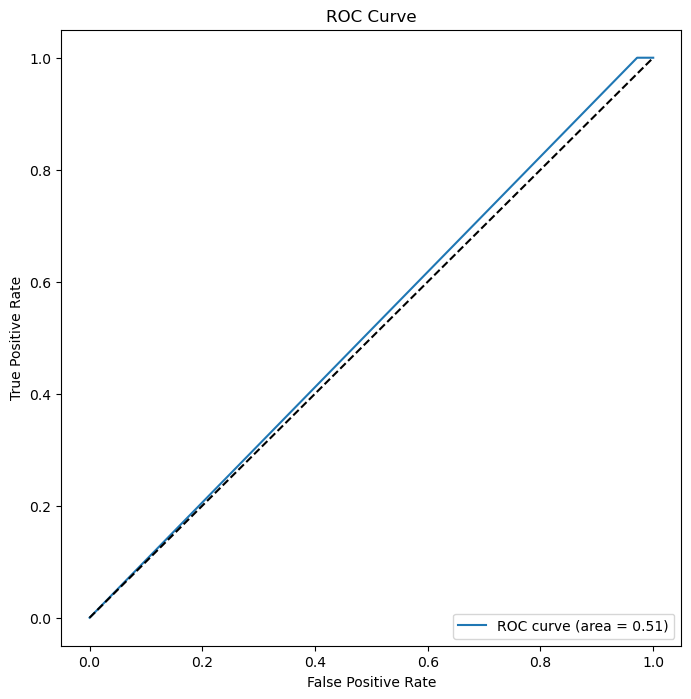

In [217]:
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score

# Make predictions
y_df_pred = model.predict(X_df_test)

# Calculate fpr, tpr, thresholds and auc for ROC curve
fpr_df, tpr_df, thresholds = roc_curve(y_df_test, y_df_pred)
roc_auc_df = auc(fpr_df, tpr_df)

# Calculate F1 score, recall and precision
f1_df = f1_score(y_df_test, y_df_pred.round())
recall_df = recall_score(y_df_test, y_df_pred.round())
precision_df = precision_score(y_df_test, y_df_pred.round())

# Print evaluation metrics
print('Accuracy:', accuracy_df)
print('AUC:', roc_auc_df)
print('F1 score:', f1_df)
print('Recall:', recall_df)
print('Precision:', precision_df)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr_df, tpr_df, label='ROC curve (area = %0.2f)' % roc_auc_df)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Replacing the null values


In [218]:
df = df.fillna(df.median())

# Handling Data Imbalance

In [219]:
print("Values:")
print(df['label'].value_counts())

Values:
0    339
1     62
Name: label, dtype: int64


In [220]:
df['average_days_between_purchases']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
396   -0.333333
397    0.000000
398    0.000000
399    0.000000
400    0.000000
Name: average_days_between_purchases, Length: 401, dtype: float64

In [221]:
df['item_id']

0      424
1      424
2      424
3      391
4      391
      ... 
396    424
397    368
398    424
399    424
400    464
Name: item_id, Length: 401, dtype: int64

In [222]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class and undersample the majority class
over = SMOTE(sampling_strategy=0.5)

# Convert all column names to string data type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a pipeline to combine both sampling techniques
pipeline = Pipeline(steps=[('o', over)])
X_train, y_train= pipeline.fit_resample(X_train, y_train)

# Label Description

In [223]:
label_distribution = pd.Series(y_train).value_counts()
print(label_distribution)

0    269
1    134
Name: label, dtype: int64


# Replacing the missing value, scaling the features, PCA for feature selection

In [224]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Replace missing values with the mean of the respective column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for feature selection
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Neural Network

In [225]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


# Train the model
history = model.fit(X_train_pca, y_train, validation_split=0.2, epochs=25, batch_size=32)

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_test_pca, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Get the predicted probabilities
y_pred_probs = model.predict(X_test_pca)

# Convert probabilities to class labels
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Calculate the evaluation metrics of the classifier
nn_accuracy = accuracy_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_roc_auc = roc_auc_score(y_test, y_pred_probs)

# Print the evaluation metrics of the classifier
print("Neural Network Accuracy:", nn_accuracy)
print("Neural Network F1 score:", nn_f1)
print("Neural Network Precision:", nn_precision)
print("Neural Network Recall:", nn_recall)
print("Neural Network ROC-AUC score:", nn_roc_auc)

Epoch 1/25
11/11 [==============================] - 2s 29ms/step - loss: 0.4919 - accuracy: 0.8106 - val_loss: 1.2835 - val_accuracy: 0.0000e+00
Epoch 2/25
11/11 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8571 - val_loss: 0.8816 - val_accuracy: 0.5432
Epoch 3/25
11/11 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.8975 - val_loss: 0.8003 - val_accuracy: 0.5432
Epoch 4/25
11/11 [==============================] - 0s 7ms/step - loss: 0.2657 - accuracy: 0.8975 - val_loss: 0.7101 - val_accuracy: 0.5556
Epoch 5/25
11/11 [==============================] - 0s 7ms/step - loss: 0.2270 - accuracy: 0.9037 - val_loss: 0.6363 - val_accuracy: 0.6296
Epoch 6/25
11/11 [==============================] - 0s 6ms/step - loss: 0.2240 - accuracy: 0.9161 - val_loss: 0.6331 - val_accuracy: 0.6296
Epoch 7/25
11/11 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.8913 - val_loss: 0.5056 - val_accuracy: 0.6667
Epoch 8/25
11/1

### ROC Curve for Neural Network

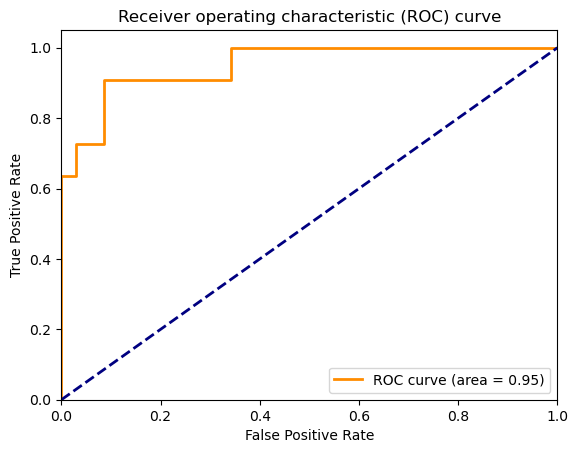

In [226]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix for Neural Network

In [227]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix

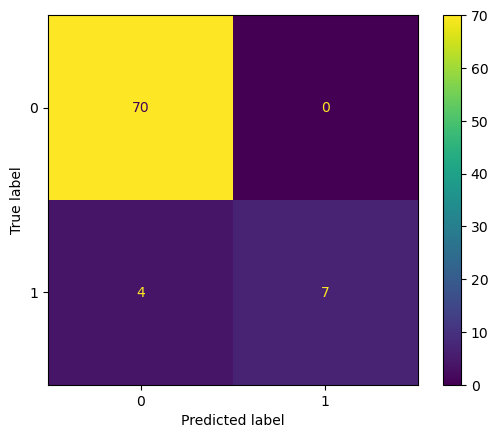

In [228]:
cm1 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp.plot()

### Running the Neural Network after dropping the correlated features

In [229]:
X = df.drop(['label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_dr_train, X_dr_test, y_dr_train, y_dr_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scipy import stats

corr_matrix = X.corr().abs()
corr_matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

x_dr=X

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
# Drop highly correlated features
cols_to_drop = set(to_drop).intersection(x_dr.columns)
x_dr = x_dr.drop(cols_to_drop, axis=1)

# Perform feature selection using RFE
estimator = LogisticRegression(solver='lbfgs')
selector = RFECV(estimator, cv=5)
selector = selector.fit(x_dr, y)


C:\Users\modis\AppData\Local\Temp\ipykernel_15568\2959499003.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['clicks', 'days_since_last_interaction', 'days_since_first_interaction', 'age_range_to_gender_interaction_count', 'previous_purchase_count', 'time_since_last_purchase', 'average_order_value', 'average_days_between_purchases', 'promo_engagement', 'cat_affinity', 'pages_viewed']


C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\modis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

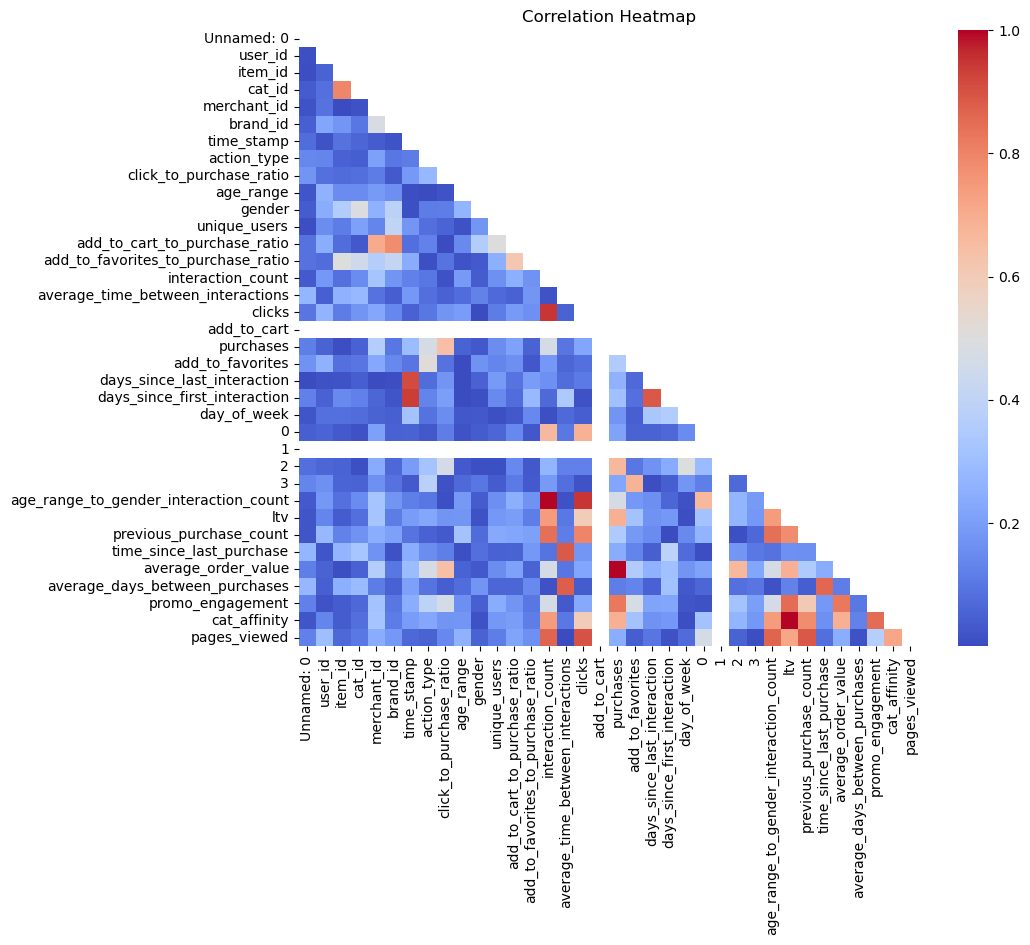

In [231]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', ax=ax)

# Add a title to the plot
plt.title('Correlation Heatmap')
plt.show()

In [251]:
columns_dr = np.array(X_dr.columns)
columns

array(['Unnamed: 0', 'user_id', 'item_id', 'cat_id', 'merchant_id',
       'brand_id', 'time_stamp', 'action_type', 'click_to_purchase_ratio',
       'age_range', 'gender', 'unique_users',
       'add_to_cart_to_purchase_ratio',
       'add_to_favorites_to_purchase_ratio', 'interaction_count',
       'average_time_between_interactions', 'clicks', 'add_to_cart',
       'purchases', 'add_to_favorites', 'days_since_last_interaction',
       'days_since_first_interaction', 'day_of_week', '0', '1', '2', '3',
       'age_range_to_gender_interaction_count', 'ltv',
       'previous_purchase_count', 'time_since_last_purchase',
       'average_order_value', 'average_days_between_purchases',
       'promo_engagement', 'cat_affinity', 'pages_viewed'], dtype=object)

In [252]:
columns = np.array(X.columns)
columns

array(['Unnamed: 0', 'user_id', 'item_id', 'cat_id', 'merchant_id',
       'brand_id', 'time_stamp', 'action_type', 'click_to_purchase_ratio',
       'age_range', 'gender', 'unique_users',
       'add_to_cart_to_purchase_ratio',
       'add_to_favorites_to_purchase_ratio', 'interaction_count',
       'average_time_between_interactions', 'clicks', 'add_to_cart',
       'purchases', 'add_to_favorites', 'days_since_last_interaction',
       'days_since_first_interaction', 'day_of_week', '0', '1', '2', '3',
       'age_range_to_gender_interaction_count', 'ltv',
       'previous_purchase_count', 'time_since_last_purchase',
       'average_order_value', 'average_days_between_purchases',
       'promo_engagement', 'cat_affinity', 'pages_viewed'], dtype=object)

In [233]:
selector.ranking_

array([13, 19, 15, 16, 18, 17, 14,  9,  1,  3, 22, 10,  7, 23,  4, 12, 24,
        2, 21, 11, 20, 25,  8,  6,  5])

In [234]:
x_dr

,Unnamed: 0,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,click_to_purchase_ratio,age_range,...,average_time_between_interactions,add_to_cart,purchases,add_to_favorites,day_of_week,0,1,2,3,ltv
0,0,190023,424,662,3432,5093.0,1111,0,0.250000,4.0,...,0.00,0,1,1,6,4,0,1,1,6
1,3,190023,424,662,3432,5093.0,1111,3,0.250000,4.0,...,0.00,0,1,1,6,4,0,1,1,6
2,4,190023,424,662,3432,5093.0,1111,2,0.250000,4.0,...,0.00,0,1,1,6,4,0,1,1,6
3,6,59812,391,1438,4687,277.0,1111,0,0.333333,4.0,...,0.00,0,1,0,6,3,0,1,0,4
4,8,59812,391,1438,4687,277.0,1111,2,0.333333,4.0,...,0.00,0,1,0,6,3,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,566,299970,424,662,3432,5093.0,1108,3,0.333333,0.0,...,0.75,0,1,1,6,2,0,1,0,10
397,567,297772,368,1611,1816,2044.0,1110,0,0.000000,3.0,...,0.00,0,0,0,5,2,0,0,0,0
398,569,22798,424,662,3432,5093.0,1111,0,0.500000,8.0,...,0.00,0,1,0,6,2,0,1,0,3
399,571,22798,424,662,3432,5093.0,1111,2,0.500000,8.0,...,0.00,0,1,0,6,2,0,1,0,3


In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Replace missing values with the mean of the respective column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_dr_train = imputer.fit_transform(X_dr_train)
X_dr_test = imputer.transform(X_dr_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_dr_train_scaled = scaler.fit_transform(X_dr_train)
X_dr_test_scaled = scaler.transform(X_dr_test)

# Perform PCA for feature selection
pca = PCA(n_components=20)
X_dr_train_pca = pca.fit_transform(X_dr_train_scaled)
X_dr_test_pca = pca.transform(X_dr_test_scaled)

### Trying out Neural Network on the least correlated features

In [236]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


# Train the model
history = model.fit(X_dr_train_pca, y_dr_train, validation_split=0.2, epochs=25, batch_size=32)

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(X_dr_test_pca, y_dr_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Get the predicted probabilities
y_dr_pred_probs = model.predict(X_dr_test_pca)

# Convert probabilities to class labels
y_dr_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Calculate the evaluation metrics of the classifier
nn_dr_accuracy = accuracy_score(y_dr_test, y_dr_pred)
nn_dr_f1 = f1_score(y_dr_test, y_dr_pred)
nn_dr_precision = precision_score(y_dr_test, y_dr_pred)
nn_dr_recall = recall_score(y_dr_test, y_dr_pred)
nn_dr_roc_auc = roc_auc_score(y_dr_test, y_dr_pred_probs)

# Print the evaluation metrics of the classifier
print("Neural Network Accuracy:", nn_dr_accuracy)
print("Neural Network F1 score:", nn_dr_f1)
print("Neural Network Precision:", nn_dr_precision)
print("Neural Network Recall:", nn_dr_recall)
print("Neural Network ROC-AUC score:", nn_dr_roc_auc)

Epoch 1/25
8/8 [==============================] - 2s 35ms/step - loss: 0.4995 - accuracy: 0.8086 - val_loss: 0.4731 - val_accuracy: 0.8438
Epoch 2/25
8/8 [==============================] - 0s 9ms/step - loss: 0.3589 - accuracy: 0.8477 - val_loss: 0.4381 - val_accuracy: 0.8594
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8789 - val_loss: 0.4502 - val_accuracy: 0.8906
Epoch 4/25
8/8 [==============================] - 0s 8ms/step - loss: 0.2774 - accuracy: 0.9062 - val_loss: 0.4711 - val_accuracy: 0.8906
Epoch 5/25
8/8 [==============================] - 0s 10ms/step - loss: 0.2307 - accuracy: 0.9180 - val_loss: 0.4655 - val_accuracy: 0.8906
Epoch 6/25
8/8 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.9141 - val_loss: 0.4778 - val_accuracy: 0.8906
Epoch 7/25
8/8 [==============================] - 0s 8ms/step - loss: 0.2186 - accuracy: 0.9219 - val_loss: 0.4685 - val_accuracy: 0.8906
Epoch 8/25
8/8 [================

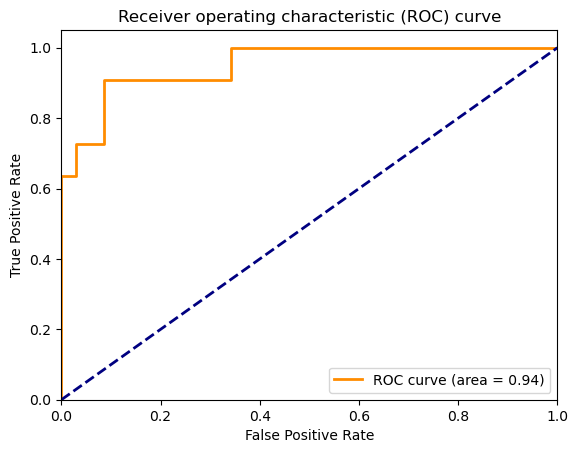

In [237]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_dr, tpr_dr, _ = roc_curve(y_dr_test, y_dr_pred_probs)
roc_auc_dr = auc(fpr_dr, tpr_dr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_dr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


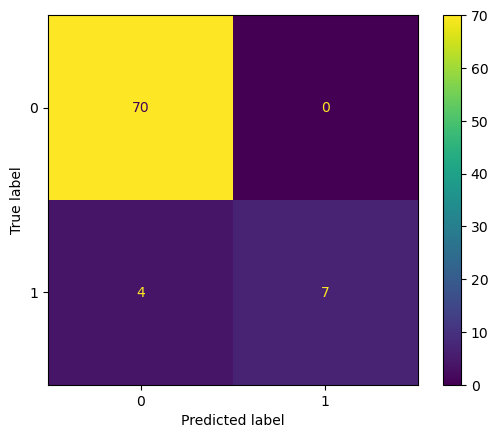

In [238]:
cm1_dr = confusion_matrix(y_dr_test,y_dr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm1_dr)
disp.plot()

# Model Evaluation visualisations

### Naive Bayes Classifier

In [239]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Train a Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = nb_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
gauss_accuracy = accuracy_score(y_test, y_pred)
gauss_f1 = f1_score(y_test, y_pred, average='weighted')
gauss_precision = precision_score(y_test, y_pred, average='weighted')
gauss_recall = recall_score(y_test, y_pred, average='weighted')
gauss_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("Gaussian Accuracy:", gauss_accuracy)
print("Gaussian F1 score:", gauss_f1)
print("Gaussian Precision:", gauss_precision)
print("Gaussian Recall:", gauss_recall)
print("Gaussian ROC-AUC score:", gauss_roc_auc)

Gaussian Accuracy: 0.7777777777777778
Gaussian F1 score: 0.7916038210155857
Gaussian Precision: 0.8087542087542088
Gaussian Recall: 0.7777777777777778
Gaussian ROC-AUC score: 0.6032467532467534


C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


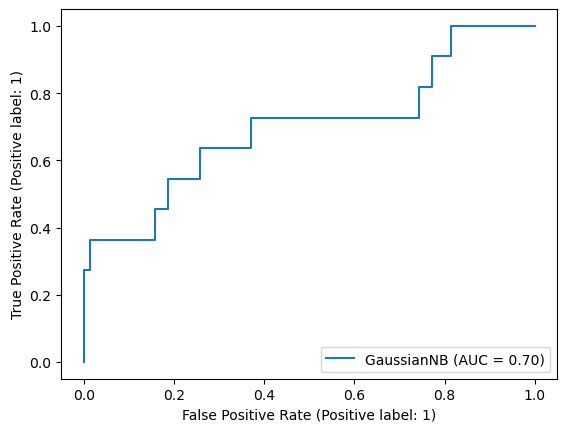

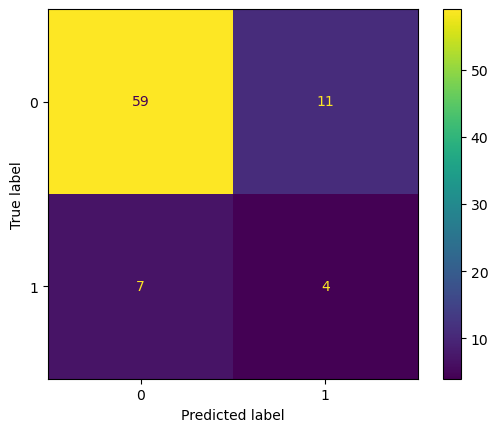

In [240]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

plot_roc_curve(nb_classifier, X_test_pca, y_test)

# Plot confusion matrix
plot_confusion_matrix(nb_classifier, X_test_pca, y_test)
plt.show()


### Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier using maximum likelihood estimation
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = lr_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
log_accuracy = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average='weighted')
log_precision = precision_score(y_test, y_pred, average='weighted')
log_recall = recall_score(y_test, y_pred, average='weighted')
log_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("Log Accuracy:", log_accuracy)
print("Log F1 score:", log_f1)
print("Log Precision:", log_precision)
print("Log Recall:", log_recall)
print("Log ROC-AUC score:", log_roc_auc)

Log Accuracy: 0.8271604938271605
Log F1 score: 0.8418094711627049
Log Precision: 0.8661038489469862
Log Recall: 0.8271604938271605
Log ROC-AUC score: 0.7467532467532467


C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


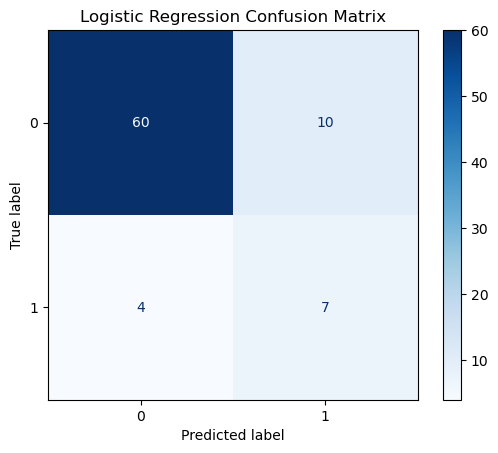

C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


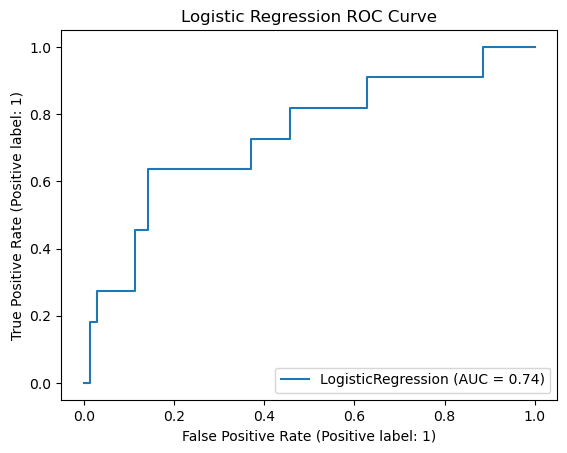

In [242]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# Plot the confusion matrix
plot_confusion_matrix(lr_classifier, X_test_pca, y_test, cmap='Blues', values_format='.0f')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Plot the ROC curve
plot_roc_curve(lr_classifier, X_test_pca, y_test)
plt.title('Logistic Regression ROC Curve')
plt.show()


### Linear Discriminant Analysis (LDA) 

In [243]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train a Linear Discriminant Analysis classifier on the training set
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_pca, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = lda_classifier.predict(X_test_pca)

# Calculate the evaluation metrics of the classifier
ldf_accuracy = accuracy_score(y_test, y_pred)
ldf_f1 = f1_score(y_test, y_pred, average='weighted')
ldf_precision = precision_score(y_test, y_pred, average='weighted')
ldf_recall = recall_score(y_test, y_pred, average='weighted')
ldf_roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')

# Print the evaluation metrics of the classifier
print("LDF Accuracy:", ldf_accuracy)
print("LDF F1 score:", ldf_f1)
print("LDF Precision:", ldf_precision)
print("LDF Recall:", ldf_recall)
print("LDF ROC-AUC score:", ldf_roc_auc)

LDF Accuracy: 0.8024691358024691
LDF F1 score: 0.8228208005985784
LDF Precision: 0.858475340082584
LDF Recall: 0.8024691358024691
LDF ROC-AUC score: 0.7324675324675324


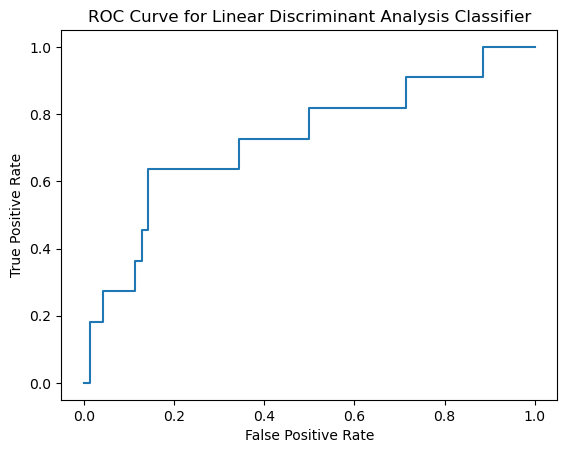

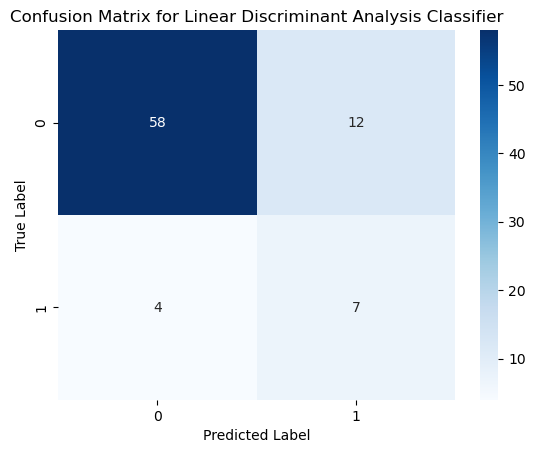

In [244]:
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the ROC curve
y_proba = lda_classifier.predict_proba(X_test_pca)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Discriminant Analysis Classifier")
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=lda_classifier.classes_, yticklabels=lda_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Linear Discriminant Analysis Classifier")
plt.show()


### XGBoost

In [245]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Replace these with the best parameters obtained from GridSearchCV
best_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'gamma': 0
}

# Create an XGBoost classifier with the best parameters
xgb_classifier = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    **best_params
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = xgb_classifier.predict(X_test)

# Calculate the evaluation metrics of the classifier
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics of the classifier
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1 score:", xgb_f1)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost ROC-AUC score:", xgb_roc_auc)

XGBoost Accuracy: 0.9629629629629629
XGBoost F1 score: 0.8421052631578948
XGBoost Precision: 1.0
XGBoost Recall: 0.7272727272727273
XGBoost ROC-AUC score: 0.8636363636363636


C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


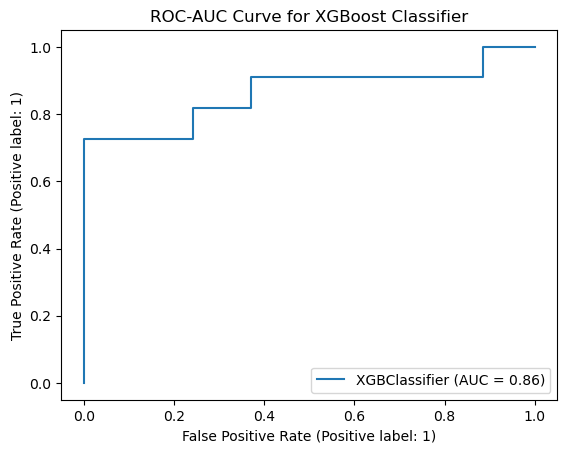

C:\Users\modis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


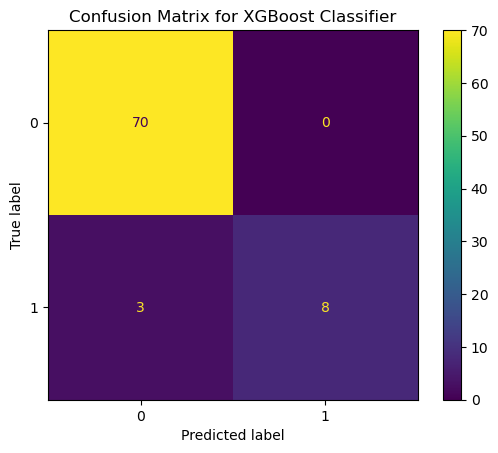

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

# Plot the ROC-AUC curve
plot_roc_curve(xgb_classifier, X_test, y_test)
plt.title('ROC-AUC Curve for XGBoost Classifier')
plt.show()

# Plot the confusion matrix
plot_confusion_matrix(xgb_classifier, X_test, y_test)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


## Recommendation System

In [269]:
# Split the data into training and testing sets

# Train the Bayes classifier on the training data
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Predict the class labels for the test data using the trained classifier
y_pred = bayes_classifier.predict(X_test)

# Calculate the accuracy of the classifier for the training and test data sets
train_accuracy = accuracy_score(y_train, bayes_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier for the training and test data sets
print("Bayes Classifier Training Accuracy:", train_accuracy)
print("Bayes Classifier Test Accuracy:", test_accuracy)

# Create a dictionary to store the recommendations for each customer
recommendations = {}

# Get the list of unique customer IDs
customer_ids = df['user_id'].unique()

# For each customer ID, make a recommendation
for customer_id in customer_ids:
    
    # Get the rows of the dataframe corresponding to the customer
    customer_data = df[df['user_id'] == customer_id]
    
    # If the customer has made only one purchase, there are no items to recommend
    if len(customer_data) == 1:
        recommendations[customer_id] = []
    else:
        # Get the item IDs of the customer's purchases
        purchased_items = list(customer_data['item_id'])
        
        # Remove duplicate item IDs
        purchased_items = list(set(purchased_items))
        
        # Create a list of item IDs that the customer has not purchased
        unpurchased_items = []
        for item_id in df['item_id'].unique():
            if item_id not in purchased_items:
                unpurchased_items.append(item_id)
        
        # Calculate the probabilities of the customer buying each unpurchased item
        probabilities = []
        for item_id in unpurchased_items:
            item_data = df[df['item_id'] == item_id]
            X_item = np.array(item_data[columns])
            prob_item = np.prod(bayes_classifier.predict_proba(X_item))
            probabilities.append(prob_item)
        
        # Sort the unpurchased items in decreasing order of probability
        sorted_items = [item for _, item in sorted(zip(probabilities, unpurchased_items), reverse=True)]
        
        # Add the top 4 items to the recommendations for the customer
        recommendations[customer_id] = sorted_items[:4]

        
# Get the first key-value pair from the recommendations dictionary
customer_id, recommended_items = next(iter(recommendations.items()))

# Print the customer ID and recommended items
print("Customer ID:", customer_id)
print("Recommended Items:", recommended_items)


Bayes Classifier Training Accuracy: 0.7741935483870968
Bayes Classifier Test Accuracy: 0.7654320987654321
Customer ID: 190023
Recommended Items: [469, 466, 343, 413]
